In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from PIL import Image
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [33]:
#Load your CSV
df=pd.read_csv('/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/2024-25 Premier League cumulative goals.csv')


In [34]:
df

Gameweek  Mohamed Salah  Alexander Isak  Erling Haaland  Chris Wood  \
0          1              1               0               1           1   
1          2              2               0               4           1   
2          3              3               1               7           2   
3          4              3               1               9           2   
4          5              3               1              10           3   
5          6              4               1              10           3   
6          7              4               1              10           4   
7          8              5               1              10           5   
8          9              6               2              11           7   
9         10              7               3              11           8   
10        11              8               4              12           8   
11        12             10               4              12           8   
12        13             11               4              12           9   
13        14             13               5              12           9   
14        15             13               6              13          10   
15        16             15               7              13          10   
16        17             16              10              13          10   
17        18             17              11              13          10   
18        19             18              12              14          11   
19        20             18              13              16          12   
20        21             18              15              16          13   
21        22             19              15              17          14   
22        23             21              17              18          14   
23        24             22              17              19          17   
24        25             23              17              19          18   
25        26             24              19              19          18   
26        27             25              19              20          18   
27        28             25              19              20          18   
28        29             27              20              21          18   
29        30             27              20              21          18   
30        31             27              20              21          18   
31        32             27              21              21          18   
32        33             27              21              21          19   
33        34             28              22              21          19   
34        35             28              23              21          19   
35        36             28              23              21          20   
36        37             28              23              21          20   
37        38             29              23              22          20   

    Bryan Mbeumo  Yoane Wissa  Ollie Watkins  Matheus Cunha  Cole Palmer  \
0              1            1              0              0            0   
1              1            1              0              1            1   
2              3            2              0              1            1   
3              3            3              2              1            1   
4              4            3              3              2            2   
5              5            3              4              2            6   
6              6            3              4              3            6   
7              6            3              5              3            6   
8              8            4              5              4            7   
9              8            4              5              4            7   
10             8            6              5              5            7   
11             8            6              6              7            7   
12             8            7              6              7            8   
13            

AttributeError: module 'matplotlib.pyplot' has no attribute 'closefig'

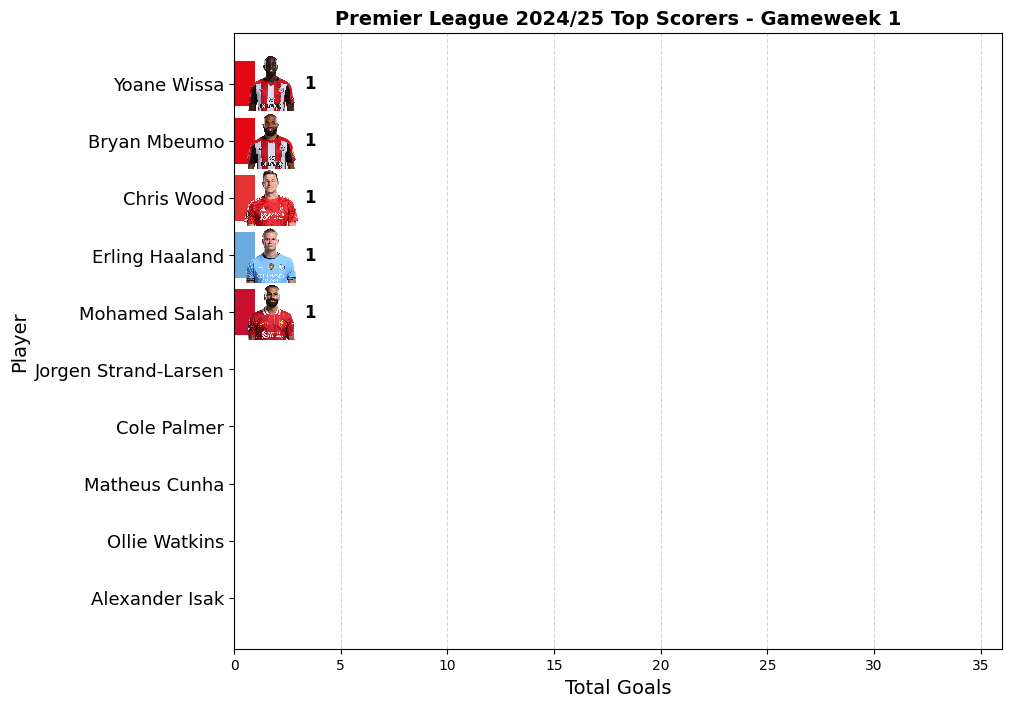

In [35]:
# Player color mapping
player_colors = {
    'Ollie Watkins': '#670e36',
    'Bryan Mbeumo': '#e30613',
    'Yoane Wissa': '#e30613',
    'Cole Palmer': '#034694',
    'Mohamed Salah': '#c8102e',
    'Erling Haaland': '#6cabdd',
    'Alexander Isak': '#241f20',
    'Chris Wood': '#e53233',
    'Matheus Cunha': '#fdb913',
    'Jorgen Strand-Larsen': '#fdb913',
}

club_badges = {
    'Ollie Watkins': '/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/2024-25 Premier League top scorer club badges/aston villa_logo.png',
    'Bryan Mbeumo': '/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/2024-25 Premier League top scorer club badges/brentford_logo.png',
    'Yoane Wissa': '/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/2024-25 Premier League top scorer club badges/brentford2_logo.png',
    'Cole Palmer': '/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/2024-25 Premier League top scorer club badges/chelsea_logo.png',
    'Mohamed Salah': '/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/2024-25 Premier League top scorer club badges/liverpool_logo.png',
    'Erling Haaland': '/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/2024-25 Premier League top scorer club badges/manchester city_logo.png',
    'Alexander Isak': '/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/2024-25 Premier League top scorer club badges/newcastle utd_logo.png',
    'Chris Wood': '/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/2024-25 Premier League top scorer club badges/nottingham forest_logo.png',
    'Matheus Cunha': '/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/2024-25 Premier League top scorer club badges/wolves_logo.png',
    'Jorgen Strand-Larsen': '/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/2024-25 Premier League top scorer club badges/wolves2_logo.png'
}

player_faces = {
    'Matheus Cunha': '/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/2024-25 Premier League top scorers/Cunha_pl.png',
    'Erling Haaland': '/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/2024-25 Premier League top scorers/Haaland_pl.png',
    'Alexander Isak': '/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/2024-25 Premier League top scorers/Isak_pl.png',
    'Bryan Mbeumo': '/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/2024-25 Premier League top scorers/Mbeumo_pl.png',
    'Cole Palmer': '/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/2024-25 Premier League top scorers/Palmer_pl.png',
    'Mohamed Salah': '/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/2024-25 Premier League top scorers/Salah_pl.png',
    'Jorgen Strand-Larsen': '/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/2024-25 Premier League top scorers/Strand Larsen_pl.png',
    'Ollie Watkins': '/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/2024-25 Premier League top scorers/Watkins_pl.png',
    'Yoane Wissa': '/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/2024-25 Premier League top scorers/Wissa_pl.png',
    'Chris Wood': '/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/2024-25 Premier League top scorers/Wood_pl.png'
}

# Load badge and face images
badge_images = {}
face_images = {}

for player in player_colors.keys():
    if player in club_badges:
        try:
            badge_images[player] = mpimg.imread(club_badges[player])
        except Exception as e:
            print(f"Could not load badge for {player}: {e}")
            
    if player in player_faces:
        try:
            face_images[player] = mpimg.imread(player_faces[player])
        except Exception as e:
            print(f"Could not load face for {player}: {e}")

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(left=0.26)

# Get all players
players = [col for col in df.columns if col != 'Gameweek']
max_goals = df[players].max().max()

# Function to create the plot for each frame
def update(frame):
    ax.clear()
    
    # Get data for the current gameweek
    gameweek_data = df.iloc[frame][players].sort_values()
    
    # Create horizontal bars
    bars = ax.barh(gameweek_data.index, gameweek_data.values, 
                  color=[player_colors.get(p, 'gray') for p in gameweek_data.index])
    
    # Add club badge and player face
    for i, player in enumerate(gameweek_data.index):
        y = i
        
        # Club badge to the left
        if player in badge_images:
            imagebox = OffsetImage(badge_images[player], zoom=0.07)
            ab = AnnotationBbox(imagebox, (gameweek_data.min() -5, y), 
                               frameon=False, box_alignment=(0.5, 0.5))
            ax.add_artist(ab)
        
        # Player face to the right
        if player in face_images and gameweek_data[player] > 0:
            imagebox = OffsetImage(face_images[player], zoom=0.08)
            ab = AnnotationBbox(imagebox, (gameweek_data[player] + 0.7, y), 
                               frameon=False, box_alignment=(0.5, 0.5))
            ax.add_artist(ab)
        
        # Add text label for the goal count
        if gameweek_data[player] > 0:
            ax.text(gameweek_data[player] + 2.3, y, f"{int(gameweek_data[player])}", 
                   va='center', fontsize=12, fontweight='bold')
    
    # Aesthetics
    ax.set_xlabel('Total Goals', fontsize=14)
    ax.set_ylabel('Player', fontsize=14)
    ax.set_title(f'Premier League 2024/25 Top Scorers - Gameweek {df.iloc[frame]["Gameweek"]}', 
                fontsize=14, weight='bold')
    
    # Set consistent x-axis limits for all frames
    ax.set_xlim(0, max_goals + 7)
    
    ax.set_yticks(range(len(gameweek_data.index)))
    ax.set_yticklabels(gameweek_data.index, fontsize=13)
    ax.grid(axis='x', linestyle='--', alpha=0.5)
    
    return bars

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(df), interval=500, blit=False)

# Saving as GIF
writer = animation.FFMpegWriter(fps=2, metadata=dict(artist='Me'), bitrate=1800)
ani.save('/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/Premier_League_2024-25_Top_Scorers.gif', 
         writer='pillow')




plt.closefig()